## 01 Class exercise slicing dataframe
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. Create a DataFrame (wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result)  
`pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])`  

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```

2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [8]:
import numpy as np
import pandas as pd

data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])

df = pd.DataFrame(data=data[1:,1:], columns=data[0,1:], index=data[1:,0])
print(df)
print(df.index)
print(df.columns)

col2 = df["Col2"]
print(col2)

col3 = df.iloc[:,2]
print(col3)

element = df.iloc[2,1] # or iloc[2][1]
print(element)

     Col1 Col2 col3
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9
Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
Row1    2
Row2    5
Row3    8
Name: Col2, dtype: object
Row1    3
Row2    6
Row3    9
Name: col3, dtype: object
8


## 02 Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups) (hint:  [ISO 3166, Alpha-3 country codes](https://www.iban.com/country-codes), a csv file can be found here: `/data/country_codes.csv`)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

Country Name
China                 1.029193e+07
United States         5.225413e+06
India                 2.232730e+06
Russian Federation    1.736985e+06
Japan                 1.206674e+06
Germany               7.203638e+05
Iran, Islamic Rep.    6.523923e+05
Saudi Arabia          6.010470e+05
Korea, Rep.           5.871564e+05
Canada                5.406148e+05
Name: 2014, dtype: float64


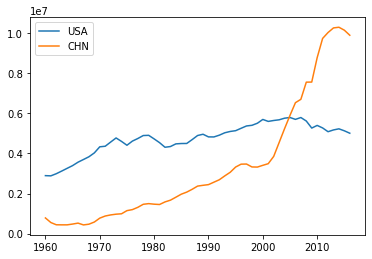

In [6]:
import pandas as pd

data = pd.read_csv('../../data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv', skiprows=4)
countries = pd.read_csv("../../data/country_codes.csv", delimiter="\t", header=None)
countries = countries.iloc[:,2].str.rstrip()
mask_country = data["Country Code"].isin(countries)
# filters, sets index, exracts series on column 2014, sorts descending
new_data = data[mask_country].set_index("Country Name")["2014"].sort_values(ascending=False)
print(new_data[:10])

# 4
usa = data[data["Country Name"] == "United States"].iloc[0][4:-3]
chn = data[data["Country Name"] == "China"].iloc[0][4:-3]
combined = pd.concat([usa, chn], axis=1, keys=["USA", "CHN"])
combined.plot()